1. DESCRIPTIVE STATISTICS ON THE DATA

In [1]:
# THIS IS THE DESCRIPTIVE STATISTICS ON THE DATA THAT WE HAVE COLLECTED

# STEP 1: SETUP
import pandas as pd

file_path = "/content/10 largest companies.csv"
df = pd.read_csv(file_path)

# STEP 2: CLEANING FUNCTIONS
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

# Clean percentage columns
percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI', 'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

# Clean 'NUMBER OF EMPLOYEES'
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 3: DESCRIPTIVE STATISTICS
summary_stats = df.groupby("COMPANY")[
    ["MARKET CAP (in B USD)", "REVENUE (in B USD)", "GROSS PROFIT (in B USD)",
     "NET INCOME (in B USD)", "ROA", "ROE", "ROI", "PROFIT MARGIN"]
].agg(["mean", "median", "std", "min", "max"]).round(2)

# Display the results
summary_stats


MARKET CAP (in B USD)                                     \
                            mean   median     std      min      max   
COMPANY                                                               
APPLE                    2801.00  2901.00  682.23  2066.00  3789.00   
GOOGLE                   1440.00  1500.00  251.00  1200.00  1800.00   
IBM                       142.73   126.28   37.99   112.16   205.99   
INTUIT                    149.85   174.96   39.50   104.09   182.13   
MICROSOFT                2068.60  1997.00  479.18  1501.00  2790.00   
ORACLE                    270.00   250.00   73.14   200.00   390.00   
PALANTIR                   59.23    35.03   71.25    13.25   185.36   
SALESFORCE                233.14   250.31   70.61   132.58   323.89   
SAP                       182.05   165.27   62.55   121.72   287.08   
SERVICENOW                135.68   129.18   52.50    78.59   218.39   

           REVENUE (in B USD)                                 ...     ROI  \
                         mean  median    std     min     max  ...    mean   
COMPANY                                                       ...           
APPLE                  361.80  383.29  50.02  274.52  394.33  ...   34.22   
GOOGLE                 276.08  282.84  62.42  182.53  350.02  ...   25.71   
IBM                     63.22   61.86   6.15   57.35   73.60  ...   23.97   
INTUIT                  12.14   12.73   3.49    7.68   16.29  ...   23.00   
MICROSOFT              193.28  198.27  39.44  143.01  245.12  ...   18.68   
ORACLE                  44.98   42.44   6.13   39.07   52.96  ...    8.77   
PALANTIR                 1.93    1.91   0.67    1.09    2.87  ...  110.75   
SALESFORCE              26.21   26.49   7.23   17.10   34.86  ...    2.39   
SAP                     35.22   34.79   3.21   32.09   39.85  ...   10.81   
SERVICENOW               7.52    7.25   2.54    4.52   10.98  ...   12.01   

                                          PROFIT MARGIN                        \
            median     std    min     max          mean median    std     min   
COMPANY                                                                         
APPLE        34.46   38.91 -26.51   80.71         23.97  24.30   1.83   20.90   
GOOGLE       26.04    5.24  18.09   30.80         25.08  24.03   3.78   21.20   
IBM          26.98    9.48   8.12   33.45          8.46   9.60   3.09    2.95   
INTUIT       23.50    1.77  20.50   25.00         19.46  18.19   3.07   16.23   
MICROSOFT    19.25    2.10  15.42   21.00         34.74  35.40   2.34   30.90   
ORACLE        8.15    2.02   6.44   11.23         22.50  19.76   7.50   15.83   
PALANTIR    135.50  163.99 -65.03  346.19        -26.89 -19.57  49.12 -106.75   
SALESFORCE    1.10    2.85   0.88    7.48          7.58   5.45   7.93    0.66   
SAP           9.55    2.73   8.71   15.42         12.95  11.42   6.18    5.55   
SERVICENOW    7.33    8.61   4.64   25.33         10.47  12.97   6.85    2.62   

                   
              max  
COMPANY            
APPLE       25.50  
GOOGLE      29.51  
IBM         10.13  
INTUIT      23.78  
MICROSOFT   36.60  
ORACLE      33.96  
PALANTIR    16.15  
SALESFORCE  19.16  
SAP         19.32  
SERVICENOW  19.30  

[10 rows x 40 columns]

2. Comparision of key financial metrics across the top enterprise software companies using plots.

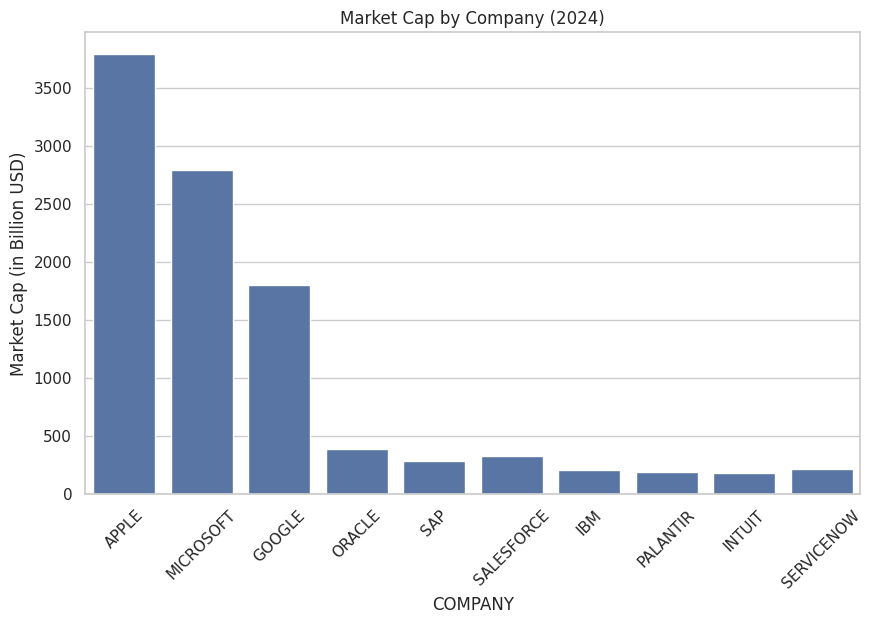

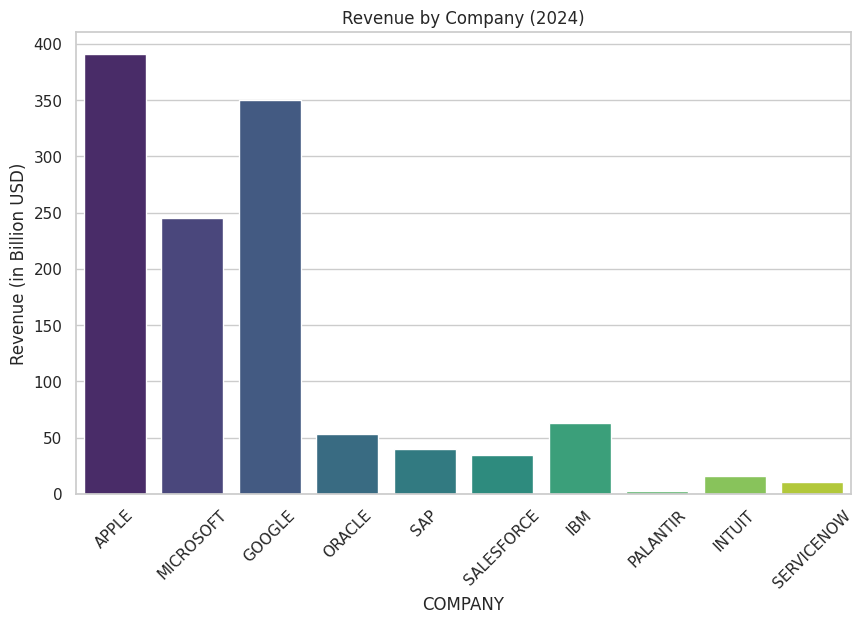

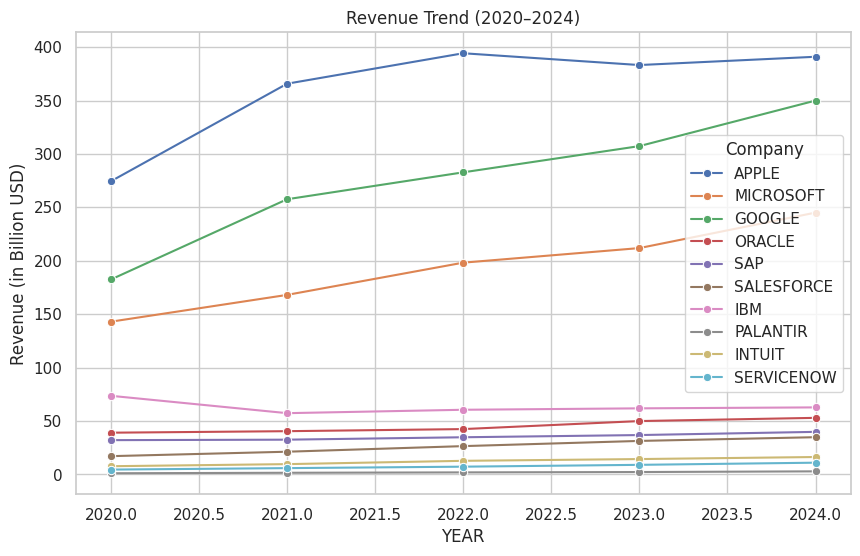

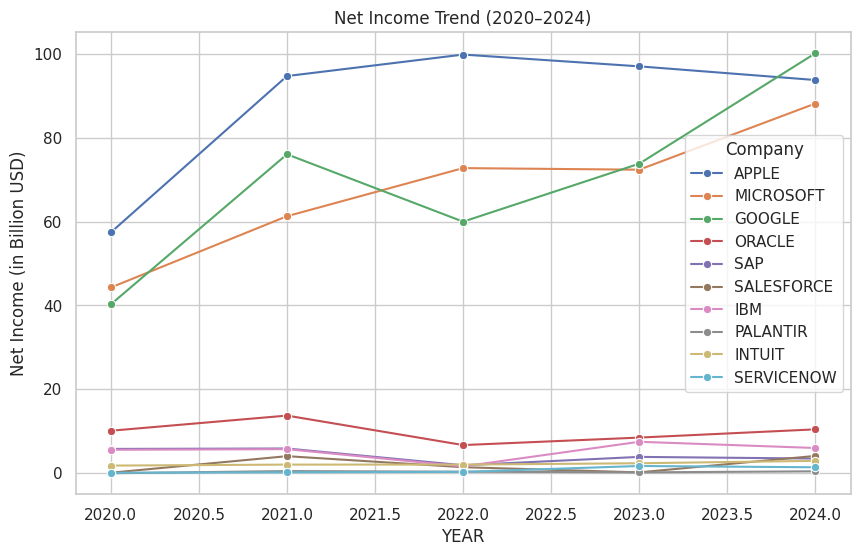

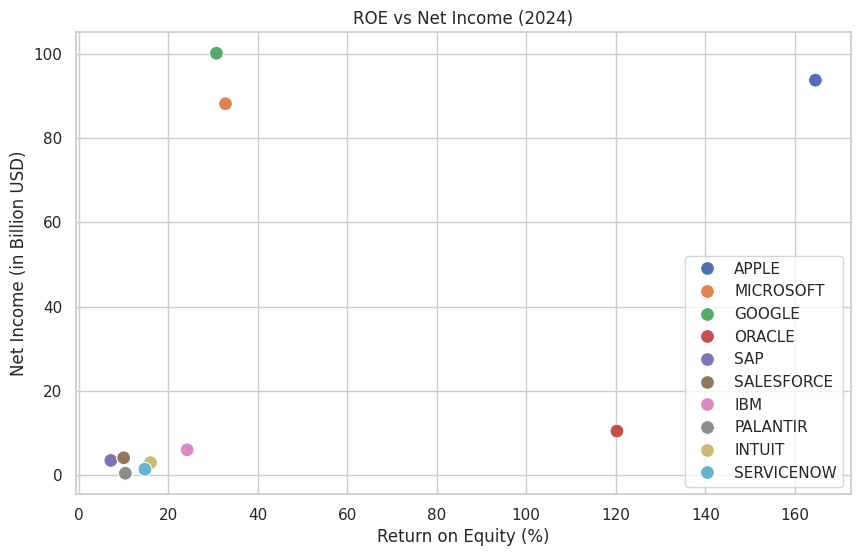

In [5]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load the dataset
file_path = "/content/10 largest companies.csv"  # Make sure the file is uploaded in Colab
df = pd.read_csv(file_path)

# STEP 3: Data cleaning
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI', 'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 4: Visualizations
latest_df = df[df["YEAR"] == 2024.0]
sns.set(style="whitegrid")

# 1. Market Cap by Company
plt.figure(figsize=(10,6))
sns.barplot(data=latest_df, x="COMPANY", y="MARKET CAP (in B USD)")
plt.title("Market Cap by Company (2024)")
plt.ylabel("Market Cap (in Billion USD)")
plt.xticks(rotation=45)
plt.show()

# 2. Revenue by Company
plt.figure(figsize=(10,6))
sns.barplot(data=latest_df, x="COMPANY", y="REVENUE (in B USD)", hue="COMPANY", palette="viridis", legend=False)
plt.title("Revenue by Company (2024)")
plt.ylabel("Revenue (in Billion USD)")
plt.xticks(rotation=45)
plt.show()

# 3. Revenue over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="YEAR", y="REVENUE (in B USD)", hue="COMPANY", marker="o")
plt.title("Revenue Trend (2020–2024)")
plt.ylabel("Revenue (in Billion USD)")
plt.legend(title="Company")
plt.show()

# 4. Net Income over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="YEAR", y="NET INCOME (in B USD)", hue="COMPANY", marker="o")
plt.title("Net Income Trend (2020–2024)")
plt.ylabel("Net Income (in Billion USD)")
plt.legend(title="Company")
plt.show()

# 5. ROE vs Net Income (2024)
plt.figure(figsize=(10,6))
sns.scatterplot(data=latest_df, x="ROE", y="NET INCOME (in B USD)", hue="COMPANY", s=100)
plt.title("ROE vs Net Income (2024)")
plt.xlabel("Return on Equity (%)")
plt.ylabel("Net Income (in Billion USD)")
plt.legend()
plt.show()


3. AI Models and trend analysis

Companies included: ['APPLE' 'MICROSOFT' 'GOOGLE' 'ORACLE' 'SAP' 'SALESFORCE' 'IBM' 'PALANTIR'
 'INTUIT' 'SERVICENOW']
Total unique companies: 10
Total records used: 50

R^2 Score: 0.9486619948819816
Mean Squared Error: 380.0363480652133

Prediction Comparison:
      Company (Year)  Actual Revenue  Predicted Revenue
0      GOOGLE (2023)         307.390             266.12
1    PALANTIR (2024)           2.866               5.54
2         IBM (2020)          73.600              44.50
3  SERVICENOW (2020)           4.520               9.77
4      ORACLE (2022)          42.440              23.64
5  SERVICENOW (2023)           8.970              13.20
6  SALESFORCE (2021)          21.252              19.48
7  SALESFORCE (2020)          17.098              12.07
8         IBM (2022)          60.530              32.11
9      ORACLE (2024)          52.961              55.82


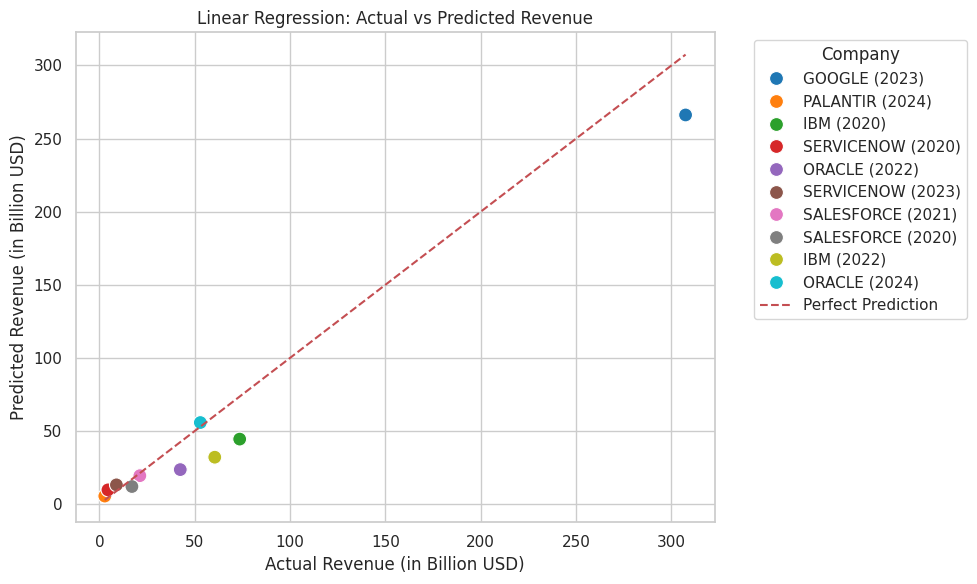

In [14]:
# 3A: THIS IS THE LINEAR REGRESSION: ACTUAL VS PREDICTED REVENUE OF DIFFERENT COMPANIES IN DIFFERENT YEARS

# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# STEP 2: Load dataset
file_path = "/content/10 largest companies.csv"
df = pd.read_csv(file_path)

# STEP 3: Clean percentage columns
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI', 'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

# STEP 4: Clean 'NUMBER OF EMPLOYEES'
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 5: Use ALL YEARS
features = ['NET INCOME (in B USD)', 'ROE', 'PROFIT MARGIN', 'NUMBER OF EMPLOYEES']
target = 'REVENUE (in B USD)'

# Drop rows with missing values and reset index
model_df = df.dropna(subset=features + [target]).reset_index(drop=True)
X = model_df[features]
y = model_df[target]
companies = model_df["COMPANY"] + " (" + model_df["YEAR"].astype(int).astype(str) + ")"

# Display basic info
print("Companies included:", model_df['COMPANY'].unique())
print("Total unique companies:", model_df['COMPANY'].nunique())
print("Total records used:", len(model_df))

# STEP 6: Train-test split
X_train, X_test, y_train, y_test, companies_train, companies_test = train_test_split(
    X, y, companies, test_size=0.2, random_state=42
)

# STEP 7: Train the regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# STEP 8: Make predictions
y_pred = lr_model.predict(X_test)

# STEP 9: Evaluation
print("\nR^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# STEP 10: Prepare results
results_df = pd.DataFrame({
    'Company (Year)': companies_test.values,
    'Actual Revenue': y_test.values,
    'Predicted Revenue': y_pred.round(2)
})

print("\nPrediction Comparison:")
print(results_df)

# STEP 11: Plot with colored dots and legend only (no labels on dots)
plot_df = pd.DataFrame({
    'Company': companies_test.values,
    'Actual Revenue': y_test.values,
    'Predicted Revenue': y_pred
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Actual Revenue', y='Predicted Revenue', hue='Company', s=100, palette='tab10')

# Red diagonal reference line
plt.plot([plot_df['Actual Revenue'].min(), plot_df['Actual Revenue'].max()],
         [plot_df['Actual Revenue'].min(), plot_df['Actual Revenue'].max()],
         'r--', label='Perfect Prediction')

plt.title("Linear Regression: Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue (in Billion USD)")
plt.ylabel("Predicted Revenue (in Billion USD)")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


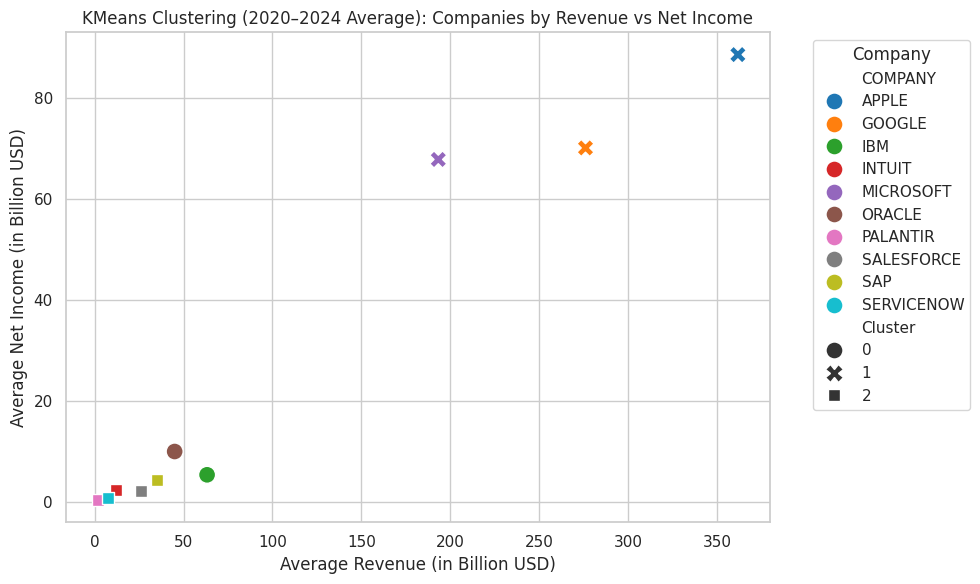


Cluster Assignments:
      COMPANY  Cluster
2         IBM        0
5      ORACLE        0
1      GOOGLE        1
0       APPLE        1
4   MICROSOFT        1
3      INTUIT        2
6    PALANTIR        2
7  SALESFORCE        2
8         SAP        2
9  SERVICENOW        2


In [17]:
# 3B: THIS IS A KMEANS CLUSTERING OF COMPANIES INTO GROUPS BASED ON THEIR AVERAGE FINANCIAL PERFORMANCE (2020–2024).



# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# STEP 2: Load dataset
file_path = "/content/10 largest companies.csv"
df = pd.read_csv(file_path)

# STEP 3: Clean percentage columns
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI', 'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

# STEP 4: Clean 'NUMBER OF EMPLOYEES'
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 5: Aggregate financial data by company
features = ['REVENUE (in B USD)', 'NET INCOME (in B USD)', 'ROE', 'PROFIT MARGIN', 'NUMBER OF EMPLOYEES']
agg_df = df.groupby("COMPANY")[features].mean().reset_index()

# STEP 6: Scale features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(agg_df[features])

# STEP 7: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
agg_df['Cluster'] = kmeans.fit_predict(scaled_features)

# STEP 8: Plot clusters with legend (one color per company)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=agg_df,
    x='REVENUE (in B USD)',
    y='NET INCOME (in B USD)',
    hue='COMPANY',
    style='Cluster',  # optional: gives different marker shapes per cluster
    palette='tab10',
    s=150
)

plt.title("KMeans Clustering (2020–2024 Average): Companies by Revenue vs Net Income")
plt.xlabel("Average Revenue (in Billion USD)")
plt.ylabel("Average Net Income (in Billion USD)")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 9: Print company cluster assignments
print("\nCluster Assignments:")
print(agg_df[['COMPANY', 'Cluster']].sort_values(by='Cluster'))


4. HISTORIC TREND OF COMPANIES

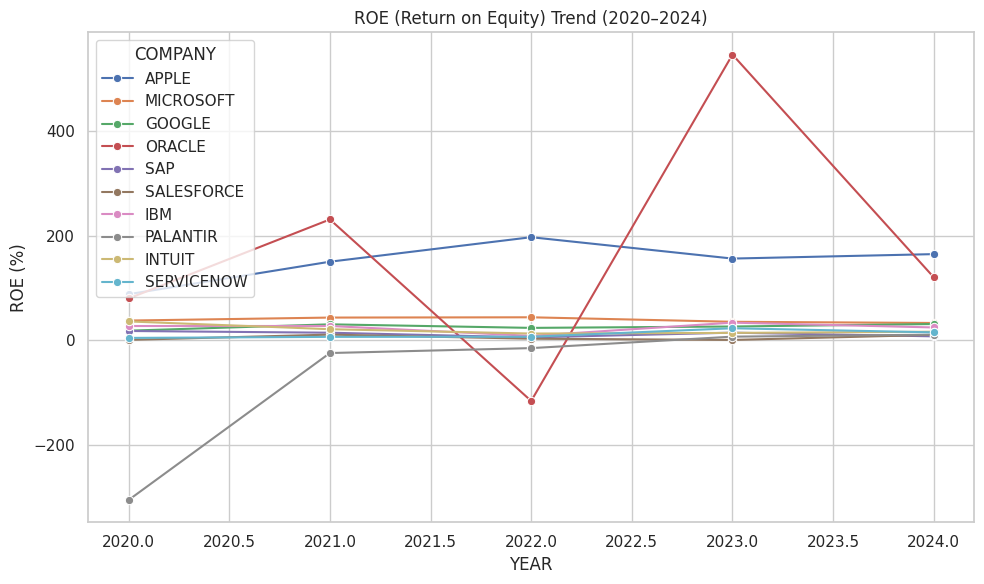

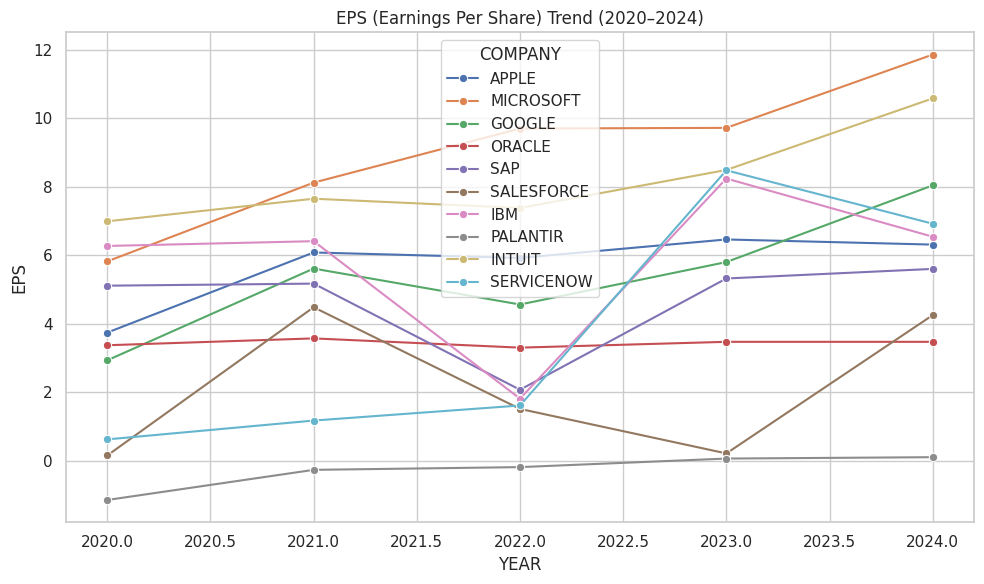

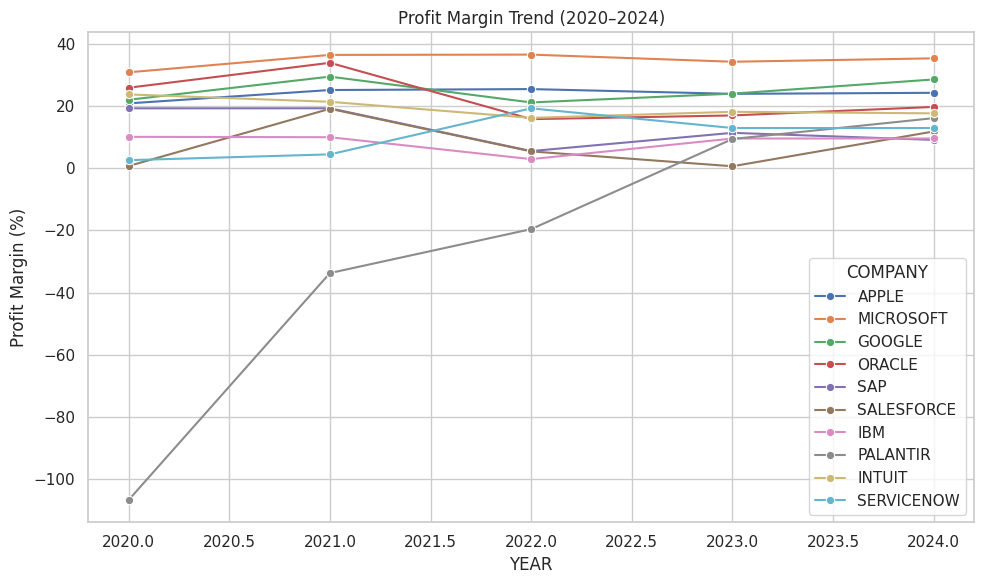

In [19]:
# PART 1: HISTORICAL TRENDS (2020–2024)

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATASET
file_path = "/content/10 largest companies.csv"
df = pd.read_csv(file_path)

# STEP 3: CLEAN PERCENTAGE COLUMNS
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI',
                      'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

# STEP 4: CLEAN 'NUMBER OF EMPLOYEES'
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 5: ROE TREND (2020–2024)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="YEAR", y="ROE", hue="COMPANY", marker="o")
plt.title("ROE (Return on Equity) Trend (2020–2024)")
plt.ylabel("ROE (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 6: EPS TREND (2020–2024)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="YEAR", y="EPS", hue="COMPANY", marker="o")
plt.title("EPS (Earnings Per Share) Trend (2020–2024)")
plt.ylabel("EPS")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 7: PROFIT MARGIN TREND (2020–2024)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="YEAR", y="PROFIT MARGIN", hue="COMPANY", marker="o")
plt.title("Profit Margin Trend (2020–2024)")
plt.ylabel("Profit Margin (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


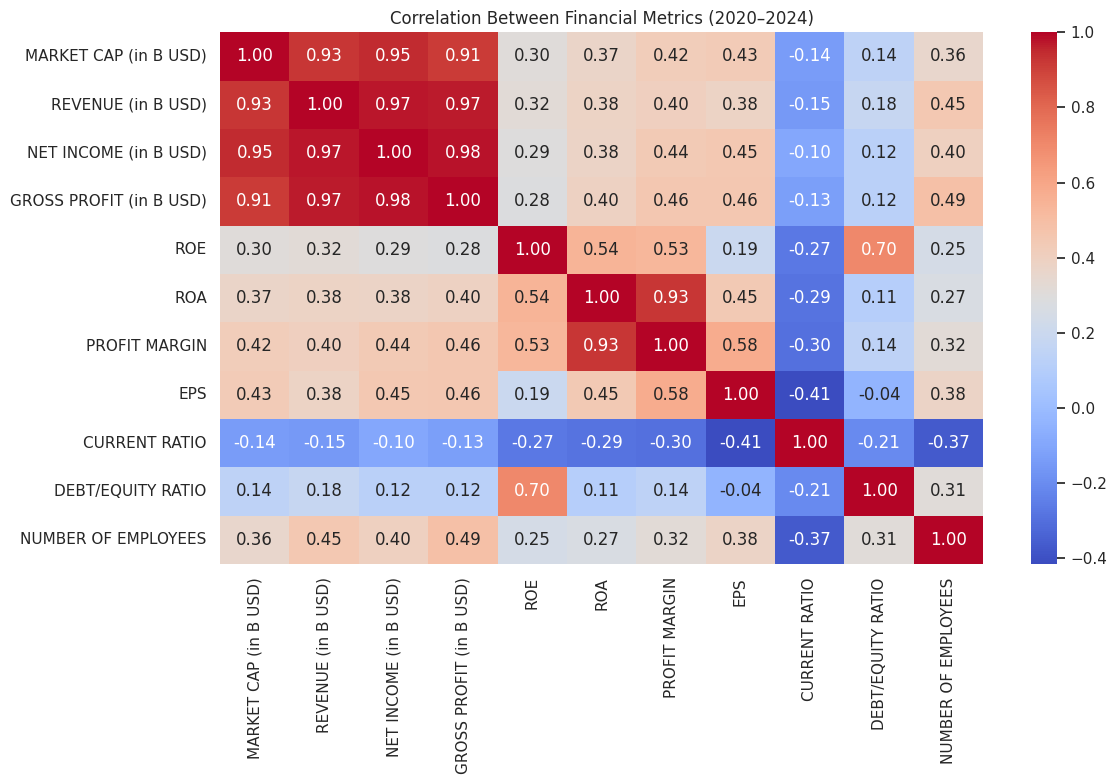

In [20]:
# PART 2: CORRELATION ANALYSIS BETWEEN FINANCIAL METRICS

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATASET
file_path = "/content/10 largest companies.csv"
df = pd.read_csv(file_path)

# STEP 3: CLEAN PERCENTAGE COLUMNS
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI',
                      'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

# STEP 4: CLEAN 'NUMBER OF EMPLOYEES'
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 5: SELECT NUMERIC FINANCIAL COLUMNS FOR CORRELATION
financial_cols = [
    'MARKET CAP (in B USD)', 'REVENUE (in B USD)', 'NET INCOME (in B USD)',
    'GROSS PROFIT (in B USD)', 'ROE', 'ROA', 'PROFIT MARGIN', 'EPS',
    'CURRENT RATIO', 'DEBT/EQUITY RATIO', 'NUMBER OF EMPLOYEES'
]

# STEP 6: COMPUTE CORRELATION MATRIX
correlation_matrix = df[financial_cols].corr()

# STEP 7: PLOT HEATMAP OF CORRELATIONS
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Financial Metrics (2020–2024)")
plt.tight_layout()
plt.show()


BONUS: radar chart for direct comparison of Apple, Microsoft, and Google across 5 core financial metrics

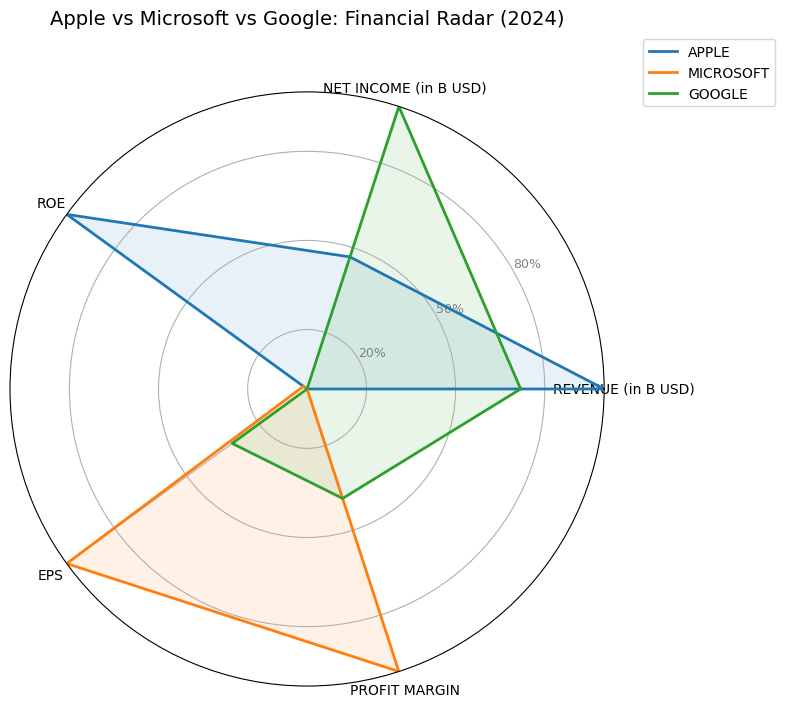

In [1]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# STEP 2: Load and clean dataset
file_path = "/content/10 largest companies.csv"
df = pd.read_csv(file_path)

# Clean percentage columns
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

percentage_columns = ['PROFIT MARGIN', 'ROA', 'ROE', 'ROI',
                      'RETURN ON TANGIBLE EQUITY', 'INFLATION RATE (IN US)']
for col in percentage_columns:
    df[col] = clean_percentage(df[col])

# Clean 'NUMBER OF EMPLOYEES'
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].astype(str).str.replace(',', '').str.strip()
df['NUMBER OF EMPLOYEES'] = pd.to_numeric(df['NUMBER OF EMPLOYEES'], errors='coerce')
df['NUMBER OF EMPLOYEES'] = df['NUMBER OF EMPLOYEES'].fillna(df['NUMBER OF EMPLOYEES'].median()).astype(int)

# STEP 3: Filter data for 2024 and selected companies
companies = ['APPLE', 'MICROSOFT', 'GOOGLE']
metrics = ['REVENUE (in B USD)', 'NET INCOME (in B USD)', 'ROE', 'EPS', 'PROFIT MARGIN']
radar_df = df[(df['YEAR'] == 2024) & (df['COMPANY'].isin(companies))]

# STEP 4: Normalize data for fair comparison (0–1 scale)
normalized_df = radar_df[["COMPANY"] + metrics].copy()
for col in metrics:
    max_val = radar_df[col].max()
    min_val = radar_df[col].min()
    normalized_df[col] = (radar_df[col] - min_val) / (max_val - min_val)

# STEP 5: Prepare radar chart data
categories = metrics
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # to close the radar chart

# STEP 6: Plot radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each company
for i, row in normalized_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, linewidth=2, label=row['COMPANY'])
    ax.fill(angles, values, alpha=0.1)

# Axis setup
plt.xticks(angles[:-1], categories, color='black')
plt.title('Apple vs Microsoft vs Google: Financial Radar (2024)', size=14, y=1.1)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.5, 0.8], ["20%", "50%", "80%"], color="grey", size=9)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
